# Analysis and Future Risk Prediction of Diabetes Mellitus

### Introduction

In this project we would perform analysis and prediction on Diabetes Data-set. Our main goal would be to extract information from the data and get a high accuracy from our prediction model. First, we will explore the data-set which would in-turn help us with data pre-processing and cleaning. After pre-processing and cleaning we will visualise and analyse the data in order to extract meaningful information. Finally we will design a prediction model with the aim to maximize accuracy.

### Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

### Read the Dataset

In [2]:
df_raw = pd.read_csv("diabetes_data.csv")

### Data Exploration

In [3]:
df_raw.shape #check the total number of rows and columns

(768, 11)

In [4]:
df_raw.head() #check the first 5 entries in the dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Doctor,Hospital
0,6,148,72,35,0,33.6,0.627,50,1,####,ABC
1,1,85,66,29,0,26.6,0.351,31,0,####,CYZ
2,8,183,64,0,0,23.3,0.672,32,1,####,NEW
3,1,89,66,23,94,28.1,0.167,21,0,####,NaN
4,0,137,40,35,168,43.1,2.288,33,1,####,FORTIS


In [5]:
df_raw.tail() #check the last 5 entries in the dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Doctor,Hospital
763,10,101,76,48,180,32.9,0.171,63,0,####,NaN
764,2,122,70,27,0,36.8,0.340,27,0,####,NaN
765,5,121,72,23,112,26.2,0.245,30,0,####,NaN
766,1,126,60,0,0,30.1,0.349,47,1,####,NaN
767,1,93,70,31,0,30.4,0.315,23,0,####,NaN


In [6]:
df_raw.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Data Preprocessing

In [7]:
df_raw.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Doctor',
       'Hospital'],
      dtype='object')

In [8]:
# Replacing "null" values with "NaN"
#df_raw[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_raw[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [9]:
df_raw.isnull().sum() #checking null values

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
Doctor                        0
Hospital                    138
dtype: int64

The column "Hospital" has "138" null values, column "Glucose" has "5" null values, column "BloodPressure" has "35" null values, column "SkinThickness" has "227" null values, column "Insulin" has "374" null values and column "BMI" has "11" null values and other columns do not have any null values in them.

In [10]:
df_raw.replace([np.inf, -np.inf], np.nan, inplace=True)

In [11]:
#def clean_dataset(df):
    #assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    #df.dropna(inplace=True)
    #indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    #return df[indices_to_keep].astype(np.float64)

### Data Cleaning

<AxesSubplot:>

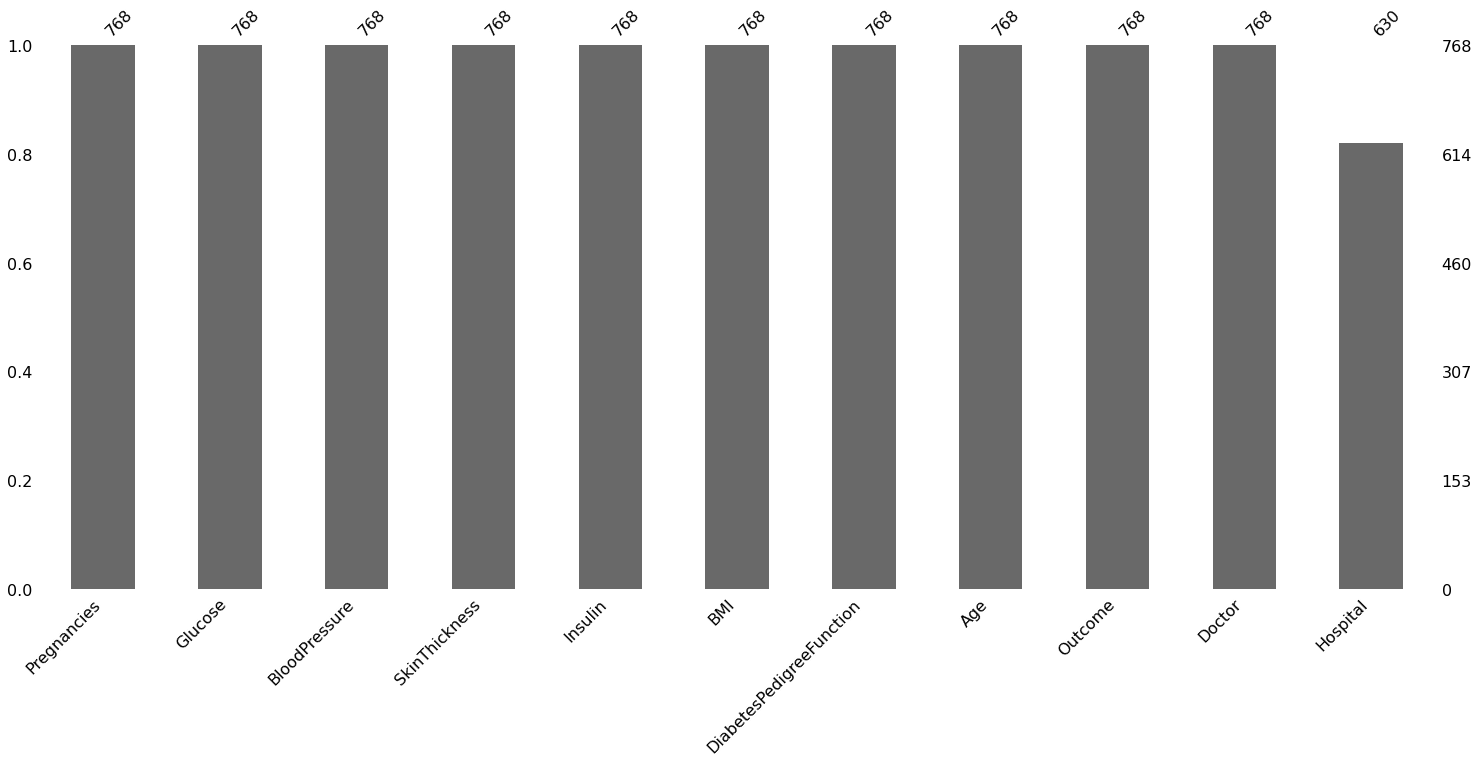

In [12]:
msno.bar(df_raw) #graph to dislay number of null values

Insulin and Skin thickness contain the most number of missing values followed by Hospital.

Droping the unrequired columns from the dataset

In [13]:
df_raw.drop(['Doctor'], axis = 1, inplace = True) #Removing the column doctor as it is not required for our prediction model

In [14]:
df_raw.drop(['Hospital'],axis = 1, inplace = True) #Removing 'Hospital' as it is not required for training the model

In [15]:
df_raw.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Handling other null values

We propose to clean the data by replacing the null values with median values. We create a funtion to find the median values in the given column. We find median values according to the "Outcome" values i.e. we handle the null values by finding median for "Outcome" having value "0" and "1" seperately and replacing them respectively.

In [16]:
def outcome_median(column_name): #function to find median  
    median = df_raw[df_raw[column_name].notnull()]
    median = median[[column_name, 'Outcome']].groupby(['Outcome'])[[column_name]].median().reset_index()
    return median

In [17]:
outcome_median('Insulin') #Finding median for column 'Insulin'

,Outcome,Insulin
0,0,39.0
1,1,0.0


In [18]:
#Replacing null values with their respective median values
df_raw.loc[(df_raw['Outcome'] == 0 )&(df_raw['Insulin'].isnull()),'Insulin'] = 102.5
df_raw.loc[(df_raw['Outcome'] == 1 )&(df_raw['Insulin'].isnull()),'Insulin'] = 169.5

In [19]:
outcome_median('Glucose') #Finding median for column 'Glucose'

,Outcome,Glucose
0,0,107.0
1,1,140.0


In [20]:
#Replacing null values with their respective median values
df_raw.loc[(df_raw['Outcome'] == 0)&(df_raw['Glucose'].isnull()),'Glucose'] = 107
df_raw.loc[(df_raw['Outcome'] == 1)&(df_raw['Glucose'].isnull()),'Glucose'] = 140

In [21]:
outcome_median('SkinThickness') #Finding median for column 'SkinThickness'

,Outcome,SkinThickness
0,0,21.0
1,1,27.0


In [22]:
#Replacing null values with their respective median values
df_raw.loc[(df_raw['Outcome'] == 0)&(df_raw['SkinThickness'].isnull()),'SkinThickness'] = 27
df_raw.loc[(df_raw['Outcome'] == 1)&(df_raw['SkinThickness'].isnull()),'SkinThickness'] = 32

In [23]:
outcome_median('BloodPressure') #Finding median for column 'BloodPressure'

,Outcome,BloodPressure
0,0,70.0
1,1,74.0


In [24]:
#Replacing null values with their respective median values
df_raw.loc[(df_raw['Outcome'] == 0)&(df_raw['BloodPressure'].isnull()),'BloodPressure'] = 70
df_raw.loc[(df_raw['Outcome'] == 1)&(df_raw['BloodPressure'].isnull()),'BloodPressure'] = 74.5

In [25]:
outcome_median('BMI') #Finding median for column 'BMI'

,Outcome,BMI
0,0,30.05
1,1,34.25


In [26]:
#Replacing null values with their respective median values
df_raw.loc[(df_raw['Outcome'] == 0 )&(df_raw['BMI'].isnull()),'BMI'] = 30.1
df_raw.loc[(df_raw['Outcome'] == 1 )&(df_raw['BMI'].isnull()),'BMI'] = 34.3

##### Checking if there is any other "null" values are in the dataset.

<AxesSubplot:>

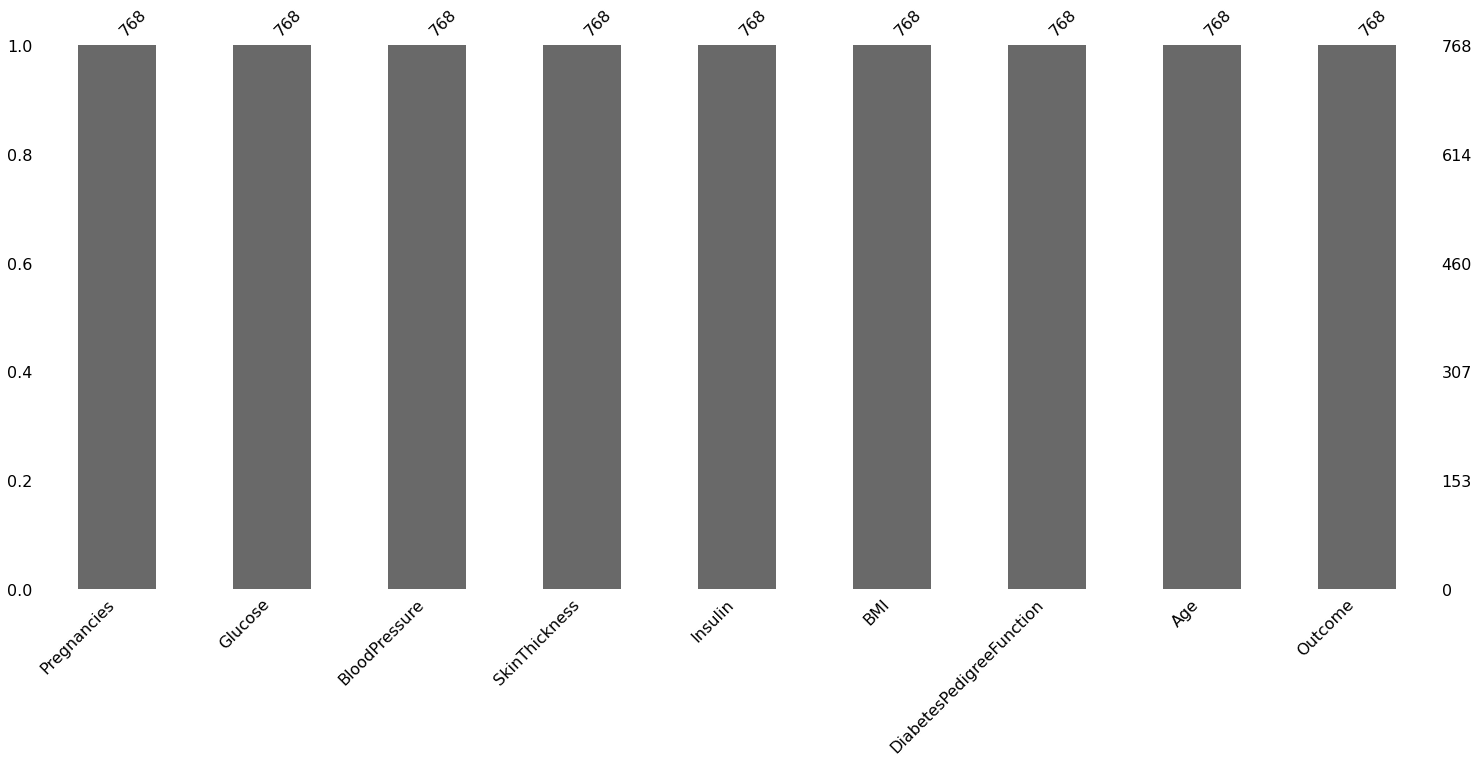

In [27]:
msno.bar(df_raw) #graph to dislay number of null values data cleaning

In [28]:
df_raw.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0.0,33.6,0.627,50,1
1,1,85,66.0,29,0.0,26.6,0.351,31,0
2,8,183,64.0,0,0.0,23.3,0.672,32,1
3,1,89,66.0,23,94.0,28.1,0.167,21,0
4,0,137,40.0,35,168.0,43.1,2.288,33,1


In [29]:
df_raw.isnull().sum() #checking null values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

From the above graph we can say that now there are no null values in our dataset. Hence, our dataset is clean.

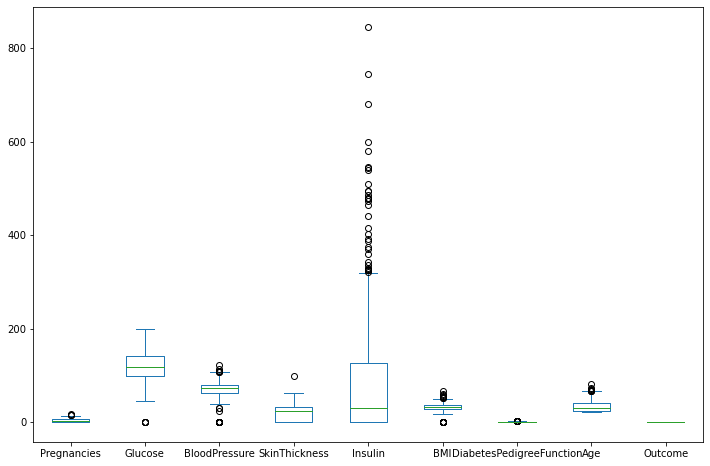

In [30]:
df_raw.plot(kind='box', figsize=(12, 8))
plt.show()

We have removed null values but analyzing the boxplot ,it tells us that there are lots of Outliers in each column having maximum in Insulin.Hence we need to make these outliers minimum by dropping them as they can effect the model prediction.

In [31]:
#define a function called "outliers" which returns a list of index of outliers
#IQR= Q3-Q1
#+/- 1.5*IQR

def outliers(df,ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3 +1.5*IQR
    ls=df.index[(df[ft]<lower_bound)|(df[ft]>upper_bound)]
    return ls

In [32]:
#create an empty List to store the output indices from multiple columns
index_list=[]
for feature in['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                'BMI', 'DiabetesPedigreeFunction', 'Age']:
    index_list.extend(outliers(df_raw,feature))

In [33]:
index_list

[88,
 159,
 298,
 455,
 75,
 182,
 342,
 349,
 502,
 7,
 15,
 18,
 43,
 49,
 60,
 78,
 81,
 84,
 106,
 125,
 172,
 177,
 193,
 222,
 261,
 266,
 269,
 300,
 332,
 336,
 347,
 357,
 362,
 426,
 430,
 435,
 453,
 468,
 484,
 494,
 522,
 533,
 535,
 549,
 589,
 597,
 601,
 604,
 619,
 643,
 691,
 697,
 703,
 706,
 579,
 8,
 13,
 54,
 111,
 139,
 153,
 186,
 220,
 228,
 231,
 247,
 248,
 258,
 286,
 296,
 360,
 370,
 375,
 392,
 409,
 415,
 480,
 486,
 519,
 574,
 584,
 612,
 645,
 655,
 695,
 707,
 710,
 715,
 753,
 9,
 49,
 60,
 81,
 120,
 125,
 145,
 177,
 193,
 247,
 303,
 371,
 426,
 445,
 494,
 522,
 673,
 684,
 706,
 4,
 12,
 39,
 45,
 58,
 100,
 147,
 187,
 218,
 228,
 243,
 245,
 259,
 292,
 308,
 330,
 370,
 371,
 383,
 395,
 445,
 534,
 593,
 606,
 618,
 621,
 622,
 659,
 661,
 123,
 363,
 453,
 459,
 489,
 537,
 666,
 674,
 684]

In [34]:
#define a function called remove which returns a cleaned dataframe without outliers
def remove(df,ls):
    ls=sorted(set(ls))
    df=df.drop(ls)
    return df

In [35]:
df_cleaned=remove(df_raw,index_list)

In [36]:
df_cleaned.shape

(639, 9)

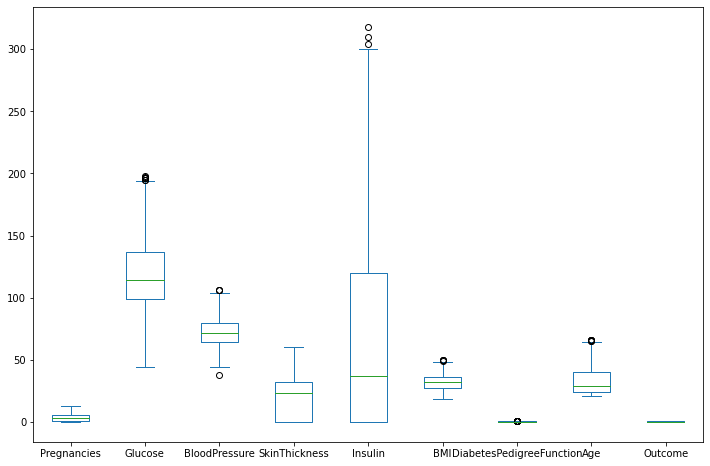

In [37]:
df_cleaned.plot(kind='box', figsize=(12, 8))
plt.show()

Now we can say our dataset is completely cleaned as no null values and no outliers in our data is present.

### Data Visualisation

Text(0.5, 1.0, 'Heatmap for the Dataset')

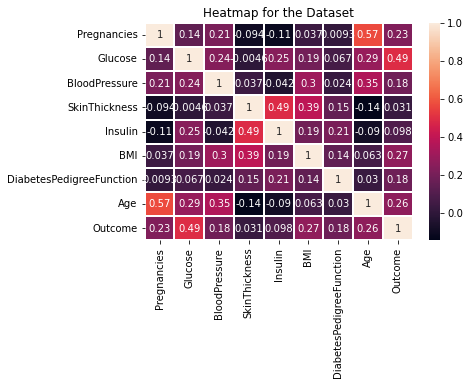

In [38]:
sns.heatmap(df_cleaned.corr(), annot = True,linewidths=2)
plt.title('Heatmap for the Dataset')

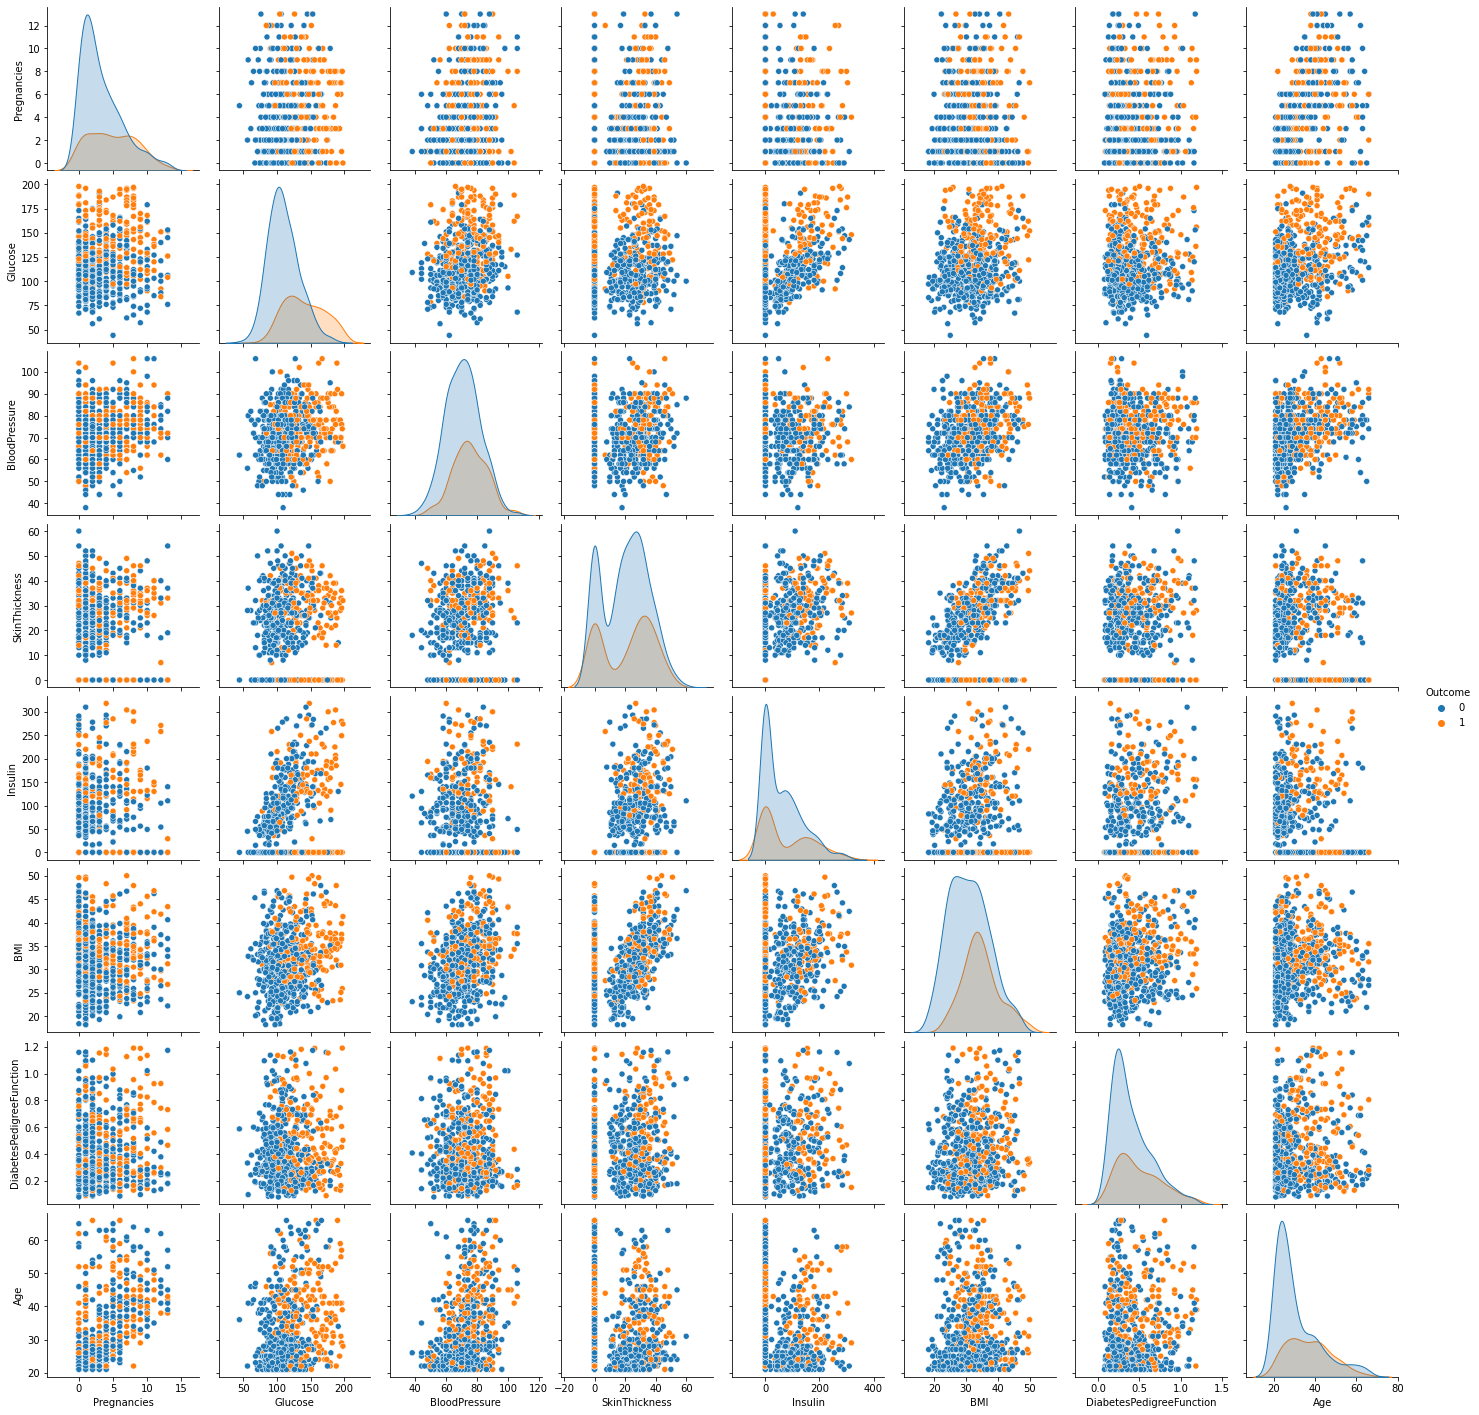

In [39]:
sns.pairplot(data = df_cleaned, hue = 'Outcome')

### Conclusion from above analysis

In order to analyze the relationship between different attributes present in the dataset, we plotted a heatmap and pairplot as shown in Data Visualisation. From that we can see that glucose and insulin are highly correlated with diabetes. We can also see that BMI and skin thickness have a high correlation with each other. There is a correlation between age and pregnancies. Insulin and glucose are also strongly correlated with each other.

### Model Building

For prediction, we will implement different supervised machine learning algorithms. We will try to maximize the accuracy of these models. To further increase the accuracy we will design a hybrid ensemble model in which we will combine six algorithms with the highest accuracy and feed their output as input to another model.

In [40]:
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

### KNN

Spliting the data into training and testing data.

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors

In [42]:
X=df_cleaned.drop('Outcome',axis = 1)
y=df_cleaned['Outcome']

In [43]:
X_train,X_test,y_train,y_test=train_test_split(df_cleaned.drop('Outcome',axis = 1),df_cleaned['Outcome'],test_size = 0.20,random_state = 101)

In [44]:
knc = KNeighborsClassifier()
knc.fit(X_train,y_train)
y_pred1 = knc.predict(X_test)

print(metrics.classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83        94
           1       0.53      0.56      0.54        34

    accuracy                           0.75       128
   macro avg       0.68      0.69      0.69       128
weighted avg       0.75      0.75      0.75       128



In [45]:
accuracy_KNC = accuracy_score(y_test, y_pred1)
print(accuracy_KNC*100)

75.0


After implementing the KNC algorithm it was found that the accuracy of model is best at n = 5 (Default) i.e. 75.00 %.

### Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
y_pred4 = LR.predict(X_test)

print(metrics.classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        94
           1       0.62      0.53      0.57        34

    accuracy                           0.79       128
   macro avg       0.73      0.71      0.72       128
weighted avg       0.78      0.79      0.78       128



In [48]:
accuracy_LR = accuracy_score(y_test, y_pred4)
print(accuracy_LR*100)

78.90625


After implementing the Logistic Regression algorithm it was found that the accuracy of model 78.90 %.

### Decision Tree

In [49]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [50]:
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=2)
clf.fit(X_train,y_train)
y_pred5 = clf.predict(X_test)

print(metrics.classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85        94
           1       0.60      0.44      0.51        34

    accuracy                           0.77       128
   macro avg       0.71      0.67      0.68       128
weighted avg       0.76      0.77      0.76       128



In [51]:
accuracy_DT = accuracy_score(y_test, y_pred5)
print(accuracy_DT*100)

77.34375


After implementing the Decision Tree algorithm it was found that the accuracy of model is 77.34 %.

### Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rf = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
rf.fit(X_train, y_train)
y_pred6 = rf.predict(X_test)

print(metrics.classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        94
           1       0.50      0.50      0.50        34

    accuracy                           0.73       128
   macro avg       0.66      0.66      0.66       128
weighted avg       0.73      0.73      0.73       128



In [54]:
accuracy_ranfor = accuracy_score(y_test, y_pred6)
print(accuracy_ranfor*100)

73.4375


After implementing the Random Forest algorithm it was found that the accuracy of model is 73.43 %.

### Naive Bayes

In [55]:
from sklearn.naive_bayes import GaussianNB

In [56]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred7 = gnb.predict(X_test)

print(metrics.classification_report(y_test,y_pred7))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84        94
           1       0.55      0.62      0.58        34

    accuracy                           0.77       128
   macro avg       0.70      0.72      0.71       128
weighted avg       0.78      0.77      0.77       128



In [57]:
accuracy_gnb = accuracy_score(y_test, y_pred7)
print(accuracy_gnb*100)

76.5625


In [58]:
from sklearn.naive_bayes import MultinomialNB

In [59]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred8 = mnb.predict(X_test)

print(metrics.classification_report(y_test,y_pred8))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        94
           1       0.35      0.44      0.39        34

    accuracy                           0.63       128
   macro avg       0.56      0.57      0.56       128
weighted avg       0.66      0.63      0.65       128



In [60]:
accuracy_mnb = accuracy_score(y_test, y_pred8)
print(accuracy_mnb*100)

63.28125


After implementing the Naive Bayes algorithm it was found that the accuracy of model is 76.56 % with Gaussian and 63.28% with Multinomial.

### SVM

In [61]:
from sklearn import svm

In [62]:
SM = svm.SVC()
SM.fit(X_train, y_train)
y_pred9 = SM.predict(X_test)

print(metrics.classification_report(y_test,y_pred9))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86        94
           1       0.62      0.47      0.53        34

    accuracy                           0.78       128
   macro avg       0.72      0.68      0.70       128
weighted avg       0.77      0.78      0.77       128



In [63]:
accuracy_SVM = accuracy_score(y_test, y_pred9)
print(accuracy_SVM*100)

78.125


After implementing the Support Vector Machine (SVM) algorithm it was found that the accuracy of model is 78.12 %.

### Perceptron

In [64]:
from sklearn.linear_model import Perceptron
p = Perceptron(random_state=42,max_iter=10,tol=0.001)
p.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(p.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(p.score(X_test, y_test)))

Accuracy on training set: 0.70
Accuracy on test set: 0.75


### Multilayer Perceptron

In [65]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.79
Accuracy on test set: 0.76


### XG Boost Classifier

In [66]:
import xgboost as xgb
XGB = xgb.XGBClassifier()
XGB.fit(X_train, y_train)

[16:46:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [67]:
y_pred10 = XGB.predict(X_test)

In [68]:
accuracy_XGB=accuracy_score(y_test,y_pred10)
print(accuracy_XGB*100)

74.21875


After implementing the XG Boost Classifier algorithm it was found that the accuracy of model is 74.21 %

### Gradient Boost Classifier

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier()
grad.fit(X_train, y_train)

GradientBoostingClassifier()

In [70]:
y_pred11 = grad.predict(X_test)

In [71]:
accuracy_GBC=accuracy_score(y_test, y_pred11)
print(accuracy_GBC*100)

75.78125


After implementing the Gradient Boost Classifier algorithm it was found that the accuracy of model is 75.78 %

In [72]:
#from sklearn.model_selection import RandomizedSearchCV

In [73]:
#XGB_params = {
#         "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
#        "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
#          "min_child_weight" : [ 1, 3, 5, 7 ],
#          "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
#          "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
#       }

In [74]:
#random_search = RandomizedSearchCV(XGB , param_distributions= XGB_params , n_iter=5, scoring='accuracy', n_jobs=-1, cv=5, verbose=3)


In [75]:
#random_search.fit(X, y)

In [76]:
#print(random_search.best_estimator_)

In [77]:
#print(random_search.best_params_)

In [78]:
#xgb_Classifier =xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=0.3,
#              enable_categorical=False, gamma=0.2, gpu_id=-1,
#              importance_type=None, interaction_constraints='',
#              learning_rate=0.2, max_delta_step=0, max_depth=3,
#              min_child_weight=3, missing=1, monotone_constraints='()',
#              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
#              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
#              subsample=1, tree_method='exact', validate_parameters=1,
#              verbosity=None)

In [79]:
#xgb_Classifier.fit(X_train, y_train)

In [80]:
#preds_HypXGB = xgb_Classifier.predict(X_test)

In [81]:
#from sklearn.metrics import classification_report, confusion_matrix

In [82]:
#print("Evaluating the hyper-tuned XGBoost Classifier Model: ")
#print("\n")
#print("Accuracy of the Hyper-Tuned XGBoost Classifier model is ", accuracy_score(y_test, preds_HypXGB))
#print("\n")
#print(classification_report(y_test, preds_HypXGB))
#print("\n")
#print(confusion_matrix(y_test, preds_HypXGB))

Evaluating the hyper-tuned XGBoost Classifier Model: 


Accuracy of the Hyper-Tuned XGBoost Classifier model is  0.7890625


              precision    recall  f1-score   support

           0       0.85      0.86      0.86        94
           1       0.61      0.59      0.60        34

    accuracy                           0.79       128
   macro avg       0.73      0.72      0.73       128
weighted avg       0.79      0.79      0.79       128



[[81 13]
 [14 20]]

### Hybrid Model

In [83]:
def get_stacking():
    level0 = list()
    level0.append(('gnb' , GaussianNB()))
    level0.append(('svm', svm.SVC()))
    level0.append(('dt', DecisionTreeClassifier()))
    level0.append(('mlp',  MLPClassifier()))
    level0.append(('gbc', GradientBoostingClassifier()))
    level0.append(('knn', KNeighborsClassifier()))
    level1 = LogisticRegression()
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=None)
    return model

In [84]:
from sklearn.ensemble import StackingClassifier
HybridModel = get_stacking()
HybridModel.fit(X_train,y_train)
y_pred12 = HybridModel.predict(X_test)

print(metrics.classification_report(y_test,y_pred12))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86        94
           1       0.61      0.50      0.55        34

    accuracy                           0.78       128
   macro avg       0.72      0.69      0.70       128
weighted avg       0.77      0.78      0.77       128



In [85]:
accuracy_HM = accuracy_score(y_test, y_pred12)
print(accuracy_HM*100)

78.125


After implementing the Hybrid Model it was found that the accuracy of model is 78.12 %.

Conclusion- By comparing accuracy scores of all algorithms we conclude that Logistic regression is the best suitable model to this problem.

### Saving the Model

In [86]:
import pickle
filename = 'model.pkl'
pickle_out = open(filename, 'wb')
pickle.dump(LR, pickle_out)
pickle_out.close()

In [87]:
loaded_model = pickle.load(open(filename, 'rb'))
y_pred13 = loaded_model.predict(X_test)

print(metrics.classification_report(y_test,y_pred13))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        94
           1       0.62      0.53      0.57        34

    accuracy                           0.79       128
   macro avg       0.73      0.71      0.72       128
weighted avg       0.78      0.79      0.78       128



In [88]:
accuracy_HML = accuracy_score(y_test, y_pred13)
print(accuracy_HML*100)

78.90625


In [89]:
x= ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
data = [4,130,79,35,120,33.6,0.627,50]
paitentid_HM = pd.DataFrame([data],columns = x)
paitentid_HM.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,4,130,79,35,120,33.6,0.627,50


In [90]:
predictions_diabetes = LR.predict(paitentid_HM)
print(predictions_diabetes)

[0]
